In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_excel("income.xlsx", names=["name","age","income"])
df

,name,age,income
0,Rob,29,45
1,Andrea,50,80
2,Mohan,35,52
3,Michael,32,41
4,Kory,36,87
5,David,48,68
6,Ismail,31,80
7,Sheela,55,60


In [2]:
X=df[['age','income']]

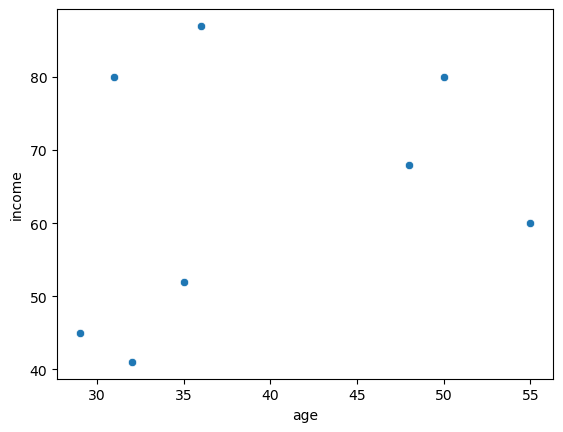

In [4]:
sns.scatterplot(X,x='age',y='income')
plt.show()

In [5]:
from sklearn.cluster import AgglomerativeClustering

In [6]:
ac=AgglomerativeClustering( n_clusters=3,linkage='ward')
ac.fit(X)

AgglomerativeClustering(n_clusters=3)

In [8]:
X['Labels']=ac.labels_

In [9]:
X

,age,income,Labels
0,29,45,1
1,50,80,0
2,35,52,1
3,32,41,1
4,36,87,2
5,48,68,0
6,31,80,2
7,55,60,0


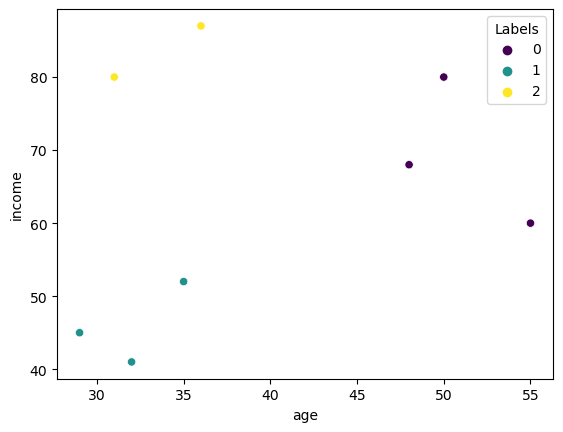

In [10]:
sns.scatterplot(X,x='age',y='income',hue='Labels',palette='viridis')
plt.show()

In [14]:
df['name'].items

<bound method Series.items of 0        Rob
1     Andrea
2      Mohan
3    Michael
4       Kory
5      David
6     Ismail
7     Sheela
Name: name, dtype: object>

In [15]:
from scipy.cluster.hierarchy import dendrogram,fcluster,linkage

In [21]:
X=df[['age','income']]
Z=linkage(X,method='single')
Z

array([[ 0.        ,  3.        ,  5.        ,  2.        ],
       [ 4.        ,  6.        ,  8.60232527,  2.        ],
       [ 2.        ,  8.        ,  9.21954446,  3.        ],
       [ 5.        ,  7.        , 10.63014581,  2.        ],
       [ 1.        , 11.        , 12.16552506,  3.        ],
       [ 9.        , 12.        , 15.65247584,  5.        ],
       [10.        , 13.        , 20.61552813,  8.        ]])

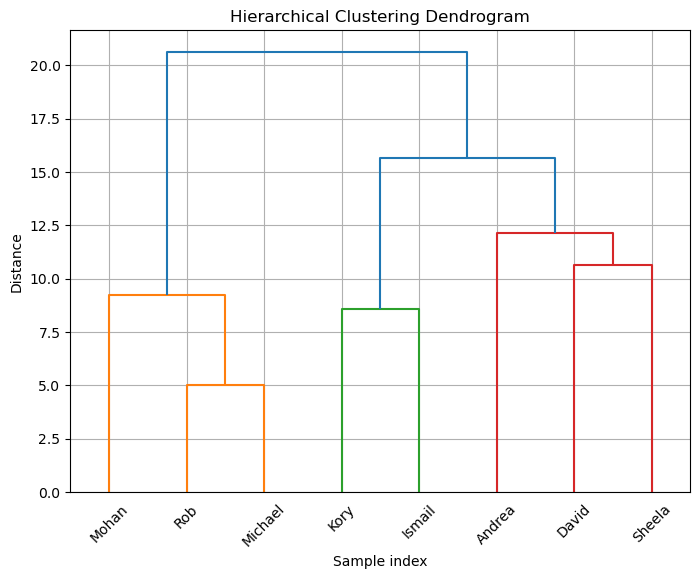

In [27]:
plt.figure(figsize=(8,6))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, labels=df['name'].values, leaf_font_size=10, leaf_rotation=45)
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.grid()
plt.show()

In [30]:
cluster=fcluster(z,t=3,criterion="maxclust")
cluster

array([1, 3, 1, 1, 2, 3, 2, 3], dtype=int32)